In [78]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
df = pd.read_csv('zad5_Stroke.csv', sep=';', decimal=',')
display(df)

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1.0,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Male,80.0,0,1.0,Yes,Private,Rural,105.92,32.5,never smoked,1
2,Female,49.0,0,0.0,Yes,Private,Urban,171.23,34.4,smokes,1
3,Female,79.0,1,NaN,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
4,Male,81.0,0,0.0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...
395,Female,58.0,0,0.0,Yes,NaN,Rural,69.12,28.3,Unknown,0
396,Female,79.0,0,0.0,No,Private,Urban,253.86,28.8,formerly smoked,0
397,Female,46.0,0,0.0,Yes,Govt_job,Urban,NaN,27.8,never smoked,0
398,Male,13.0,0,0.0,No,children,Urban,NaN,24.3,Unknown,0


In [80]:
df.dtypes

gender                object
age                  float64
hypertension           int64
heart_disease        float64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

In [81]:
df['heart_disease'].fillna(df['heart_disease'].interpolate(), inplace=True)
df['avg_glucose_level'].fillna(df['avg_glucose_level'].interpolate(), inplace=True)
df['bmi'].fillna(df['bmi'].interpolate(), inplace=True)

In [82]:
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = [col for col in df.columns if col not in categorical_columns + ['stroke']]
x_numeric = df[numerical_columns]
x_categorical = df[categorical_columns]

encoder = LabelEncoder()
x_categorical_encoded = x_categorical.apply(encoder.fit_transform)

x = pd.concat([x_numeric, x_categorical_encoded], axis=1)
df.drop(['stroke'], axis=1)
y = df['stroke']

In [83]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=10)

In [84]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Średnia dokładność treningowa: 0.566, Hiperparametry: {'C': 0.001}
Dokładnośc dla zbioru treningowego: 0.606
Dokładność dla zbioru testowego: accuracy=0.562


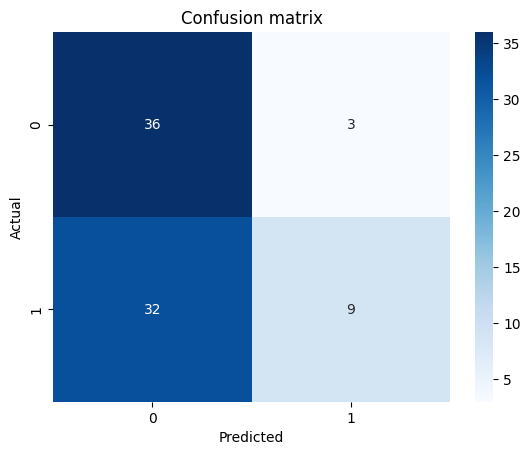

Współczynniki decyzyjne:
Cecha 1: 0.19102591722194015
Cecha 2: 0.05
Cecha 3: 0.07245532709025078
Cecha 4: 0.06448520164294755
Cecha 5: 0.0006942016449142645
Cecha 6: 0.018446763318346035
Cecha 7: 0.07049681945352555
Cecha 8: -0.003570299156254179
Cecha 9: 0.008007667258466234
Cecha 10: -0.006771390102287298
Bias (wyraz wolny): [-0.30048499]
Średnia dokładność treningowa: 0.784, Hiperparametry: {'C': 0.01}
Dokładnośc dla zbioru treningowego: 0.791
Dokładność dla zbioru testowego: accuracy=0.738


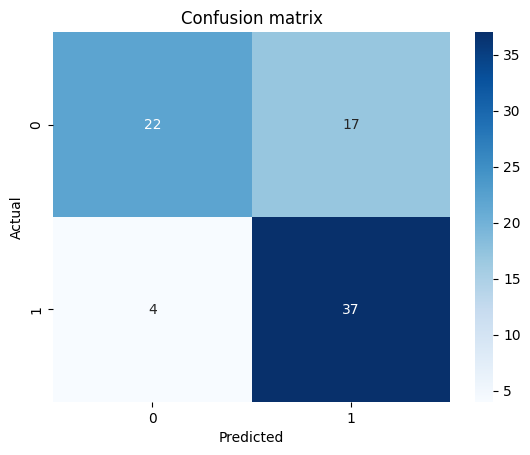

Współczynniki decyzyjne:
Cecha 1: 0.7541695546397144
Cecha 2: 0.08091758890692559
Cecha 3: 0.06618573767480253
Cecha 4: 0.11717740270168227
Cecha 5: -0.08138469385492215
Cecha 6: 0.07713404310459016
Cecha 7: 0.025858748768336617
Cecha 8: 0.05050649387016463
Cecha 9: 0.03757395547747813
Cecha 10: -0.0877241196841819
Bias (wyraz wolny): [0.10821645]
Średnia dokładność treningowa: 0.775, Hiperparametry: {'C': 0.1}
Dokładnośc dla zbioru treningowego: 0.803
Dokładność dla zbioru testowego: accuracy=0.713


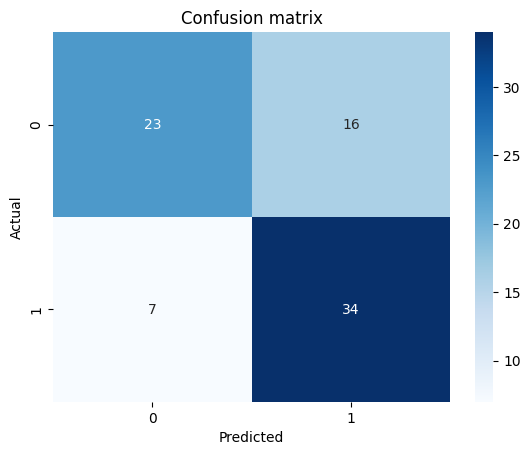

Współczynniki decyzyjne:
Cecha 1: 1.196945510443898
Cecha 2: 0.025743360381590308
Cecha 3: 0.01004952881385629
Cecha 4: 0.15905346775384982
Cecha 5: -0.040251442302668576
Cecha 6: 0.16950818990697533
Cecha 7: -0.035576008176726195
Cecha 8: 0.0571065162300457
Cecha 9: 0.10501049539018809
Cecha 10: -0.03438932478563725
Bias (wyraz wolny): [-0.04136838]
Średnia dokładność treningowa: 0.772, Hiperparametry: {'C': 1}
Dokładnośc dla zbioru treningowego: 0.803
Dokładność dla zbioru testowego: accuracy=0.713


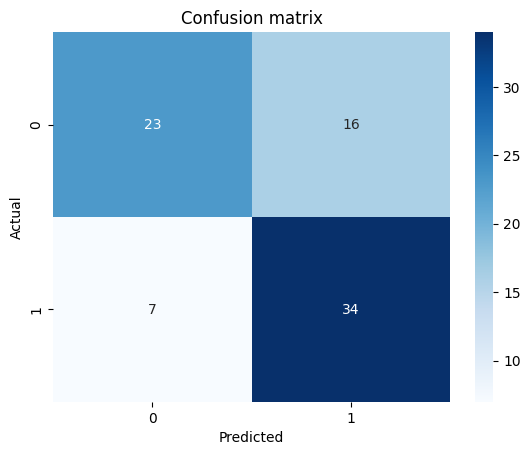

Współczynniki decyzyjne:
Cecha 1: 1.3765348769294767
Cecha 2: -0.000905883517519801
Cecha 3: 0.0074036888014688
Cecha 4: 0.1855481948201394
Cecha 5: -0.10528334977799925
Cecha 6: 0.23905199445079928
Cecha 7: -0.03105348845407918
Cecha 8: 0.021927739281318637
Cecha 9: 0.1489088299812128
Cecha 10: -0.04674621002702062
Bias (wyraz wolny): [-0.06549775]
Średnia dokładność treningowa: 0.766, Hiperparametry: {'C': 10}
Dokładnośc dla zbioru treningowego: 0.800
Dokładność dla zbioru testowego: accuracy=0.713


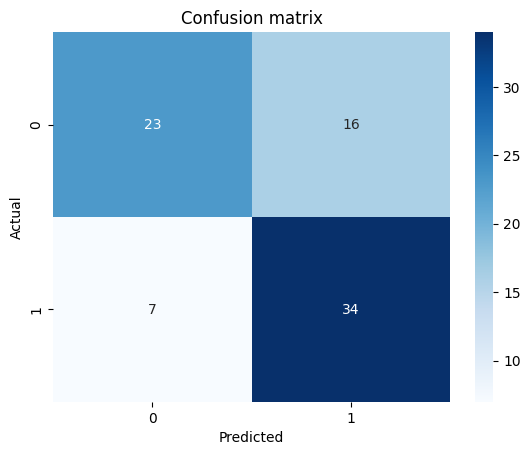

Współczynniki decyzyjne:
Cecha 1: 1.4068799671922463
Cecha 2: -0.006531601359202277
Cecha 3: -0.0030929762764717594
Cecha 4: 0.1812734683615851
Cecha 5: -0.09561543516436011
Cecha 6: 0.2304225189032465
Cecha 7: -0.04346896320133098
Cecha 8: 0.013225344917286108
Cecha 9: 0.17001633898546276
Cecha 10: -0.042318606591352115
Bias (wyraz wolny): [-0.06918788]
Średnia dokładność treningowa: 0.766, Hiperparametry: {'C': 100}
Dokładnośc dla zbioru treningowego: 0.800
Dokładność dla zbioru testowego: accuracy=0.713


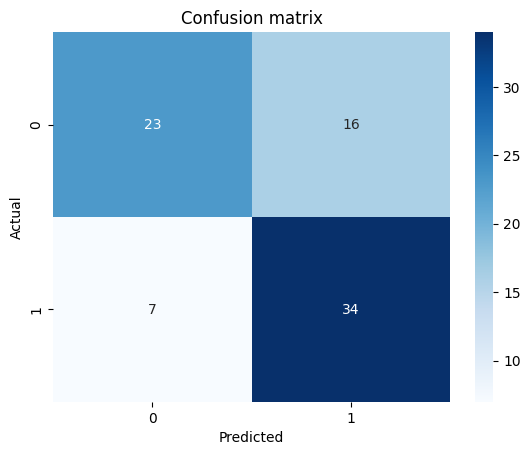

Współczynniki decyzyjne:
Cecha 1: 1.4069312752037142
Cecha 2: -0.006478316874122925
Cecha 3: -0.003329728955719702
Cecha 4: 0.1813661097129966
Cecha 5: -0.09557421009097311
Cecha 6: 0.23020181222614156
Cecha 7: -0.044006441167312005
Cecha 8: 0.013345436186710913
Cecha 9: 0.17036134231805988
Cecha 10: -0.041978889897436034
Bias (wyraz wolny): [-0.06922329]


In [85]:
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}

svm_model = SVC(kernel='linear')

grid_search = GridSearchCV(svm_model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

results = grid_search.cv_results_

for mean_score, params in zip(results['mean_test_score'], results['params']):
    print(f"Średnia dokładność treningowa: {mean_score:.3f}, Hiperparametry: {params}")

    best_model = SVC(kernel='linear', **params)
    best_model.fit(X_train, y_train)

    y_pred_train = best_model.predict(X_train)
    accuracy_train = accuracy_score(y_train, y_pred_train)
    print(f"Dokładnośc dla zbioru treningowego: {accuracy_train:.3f}")

    y_pred_test = best_model.predict(X_test)
    accuracy_test = accuracy_score(y_test, y_pred_test)
    print(f"Dokładność dla zbioru testowego: accuracy={accuracy_test:.3f}")

    conf_matrix = confusion_matrix(y_test, y_pred_test)
    conf_matrix_with_labels = pd.DataFrame(conf_matrix, columns=[0, 1], index=[0, 1])
    sns.heatmap(conf_matrix_with_labels, annot=True, fmt='d', cmap='Blues')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion matrix')
    plt.show()

    coefficients = best_model.coef_ 
    intercept = best_model.intercept_

    print(f"Współczynniki decyzyjne:")
    for i, coef in enumerate(coefficients[0]):
        print(f"Cecha {i+1}: {coef}")
    
    print(f"Bias (wyraz wolny):", intercept)

    print("="*50)

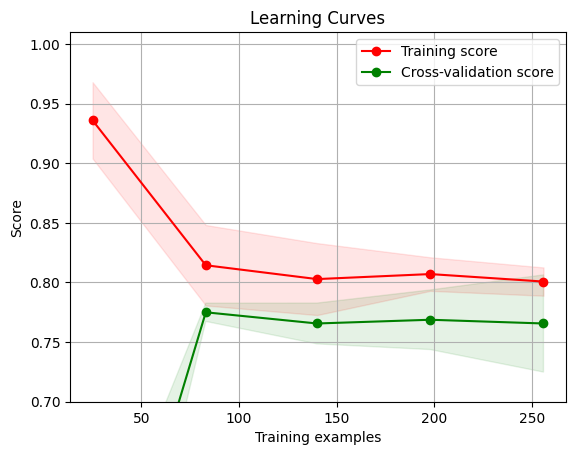

In [86]:
# Funkcja do generowania krzywych uczenia
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None, n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt

# Wywołanie funkcji do generowania krzywych uczenia
title = "Learning Curves"
plot_learning_curve(best_model, title, X_train, y_train, ylim=(0.7, 1.01), cv=5, n_jobs=4)
plt.show()


Wykres cech

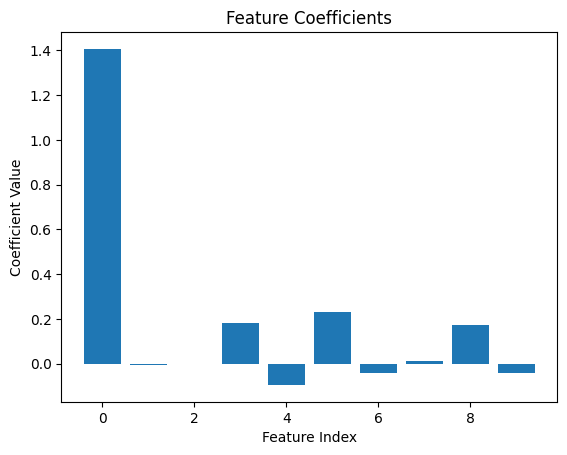

In [87]:
features = range(len(coefficients[0]))
plt.bar(features, coefficients[0])
plt.xlabel("Feature Index")
plt.ylabel("Coefficient Value")
plt.title("Feature Coefficients")
plt.show()